# Conceptos básicos de análisis multivariante

>Este tutorial es una selección y adaptación al español de los libros [Multivariate Data Analysis](https://www.cengage.co.uk/books/9781473756540/) de Joseph F. Hair et al. y [A Matrix Algebra Companion for Statistical Learning](http://www.gastonsanchez.com/matrix4sl/index.html) de Gaston Sanchez. 

## El variante

El componente básico del análisis multivariante es el variante, una combinación lineal de variables con ponderaciones determinadas empíricamente. Las variables son especificadas por el investigador mientras que los pesos los determina la técnica multivariante para cumplir con un objetivo específico. 

Un variante de n variables ponderadas ($X_{1}$ a $X_{n}$) se puede establecer matemáticamente como:

$$ Variante = w_{1} X_{1} + w_{2} X_{2} + w_{3} X_{3} + ... + w_{n} X_{n}  $$

donde $X_{n}$ es la variable observada y $w_{n}$ es el peso determinado por la técnica multivariante.

El resultado es un valor único que representa una combinación de todo el conjunto de variables que mejor logra el objetivo del análisis multivariado específico.

Veamos algunos ejemplos:

- En la regresión múltiple, la variable se determina de una manera que maximiza la correlación entre las múltiples variables independientes y la única variable dependiente. 

- En el análisis factorial exploratorio, las variantes se forman para representar mejor la estructura o los patrones subyacentes de las variables representadas por sus intercorrelaciones. En cada caso, la variante captura el carácter multivariado del análisis.

Por lo tanto, en nuestra discusión de cada técnica, el variante es el punto focal del análisis en muchos aspectos. Debemos comprender no solo su impacto colectivo en el cumplimiento del objetivo de la técnica, sino también la contribución de cada variable separada al efecto de variación general.

## Tipos de variables

Para ilustrar algunas de las ideas presentadas en este capítulo, usaré un ejemplo de juguete con datos de los personajes del universo de Star Wars:


In [6]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/gastonstat/matrix4sl/master/data/starwars.csv')
df

,name,gender,height,weight,eyecolor,haircolor,skincolor,homeland,born,died,jedi,species,weapon
0,Anakin Skywalker,male,1.88,84.0,blue,blond,fair,Tatooine,41.9BBY,4ABY,yes_jedi,human,lightsaber
1,Padme Amidala,female,1.65,45.0,brown,brown,light,Naboo,46BBY,19BBY,no_jedi,human,unarmed
2,Luke Skywalker,male,1.72,77.0,blue,blond,fair,Tatooine,19BBY,unk_died,yes_jedi,human,lightsaber
3,Leia Organa,female,1.50,49.0,brown,brown,light,Alderaan,19BBY,unk_died,no_jedi,human,blaster
4,Qui-Gon Jinn,male,1.93,88.5,blue,brown,light,unk_planet,92BBY,32BBY,yes_jedi,human,lightsaber
5,Obi-Wan Kenobi,male,1.82,77.0,bluegray,auburn,fair,Stewjon,57BBY,0BBY,yes_jedi,human,lightsaber
6,Han Solo,male,1.80,80.0,brown,brown,light,Corellia,29BBY,unk_died,no_jedi,human,blaster
7,Sheev Palpatine,male,1.73,75.0,blue,red,pale,Naboo,82BBY,10ABY,no_jedi,human,force-lightning
8,R2-D2,male,0.96,32.0,NaN,NaN,NaN,Naboo,33BBY,unk_died,no_jedi,droid,unarmed
9,C-3PO,male,1.67,75.0,NaN,NaN,NaN,Tatooine,112BBY,3ABY,no_jedi,droid,unarmed


La tabla consta de 20 filas y 7 columnas. Las filas corresponden a individuos y las columnas corresponden a variables. Aunque este conjunto de datos es un ejemplo de juguete, contiene variables de diferentes tipos que se encuentran comúnmente en conjuntos de datos reales.

Curiosamente, podemos clasificar las variables de dos formas diferentes.

La forma más básica y habitual de clasificar variables es en dos tipos distintos: variables cuantitativas y variables categóricas (o cualitativas):

<p align="center">
  <img width="750" src="https://github.com/gastonstat/matrix4sl/raw/master/images/variables/variable-types.png" alt="Variable Types">
</p>

Las variables `height` y `weight` son ejemplos de variables cuantitativas porque sus valores representan cantidades. Es decir, se pueden medir numéricamente en algún tipo de escala de intervalo.

A su vez, variables `name`, `gender`, `species`, `jedi` y `weapon` son variables categóricas o cualitativas porque sus valores representan categorías (o cualidades). Más formalmente, describen una cualidad de un individuo y le permiten ubicar a un individuo en una categoría o grupo, como hombre o mujer.

La división entre variables categóricas y cuantitativas no es la única. A menudo, los científicos de datos clasifican además las variables categóricas como nominales u ordinales. Asimismo, las variables cuantitativas se pueden clasificar en discretas o continuas. 

Este siguiente nivel de clasificación se basa principalmente en la noción de escalas de medición de las variables:

<p align="center">
  <img width="750" src="https://github.com/gastonstat/matrix4sl/raw/master/images/variables/variable-qual-quant.png" alt="Variable Types">
</p>

### Variable nominal

Una variable categórica es nominal cuando resulta de nombrar o etiquetar valores que no tienen un orden natural. Un ejemplo de una variable nominal es `weapon` que tiene los siguientes valores:

In [7]:
print(df['weapon'].unique())

['lightsaber' 'unarmed' 'blaster' 'force-lightning' 'bowcaster'
 'slugthrower' 'spear']


¿Puedes ordenar las categorías de forma “natural”? Realmente no. 

El término nominal según el diccionario significa "existente sólo de nombre". Por tanto, los valores nominales son solo eso: nombres. No hay ninguna razón por la que el blaster sea mejor o más grande que el sable de luz. Se podría decir que prefiere un bláster a un sable de luz, pero esa es una variable diferente: preferencia personal.

Otros ejemplos típicos de variables nominales son:

- Sexo de un niño recién nacido: mujer u hombre
- Etnia de un individuo: nativo americano, afroamericano, asiático, blanco
- Sabores de helado: chocolate, vainilla, fresa
- Números en las camisetas de los jugadores de un equipo de fútbol: números utilizados como identificadores

### Variable ordinal

Una variable categórica es ordinal cuando resulta de ordenar valores en una serie de categorías cuando no se dispone de una escala numérica adecuada. Por ejemplo, considere una variable "frecuencia de uso" medida con valores nunca, a veces y siempre. En este caso podemos ordenar las categorías de menos uso a más uso, o viceversa.

Algunos ejemplos de variables ordinales son:

- Tamaño de la ropa: extra-pequeña, pequeña, mediana, grande, extra-grande
- Año universitario: cachimbo, estudios generales, estudios en facultad, egresado
- Picante: ninguno, leve, moderado, mucho
- Rangos jedis: joven, padawan, caballero, maestro y gran maestro

### Variable discreta

Una variable cuantitativa es discreta cuando resulta de contar. Para ser más precisos, una variable discreta toma cero o un valor entero positivo. 

Algunos ejemplos de variables discretas son:

- Número de ewooks masculinos en una familia con cuatro hijos (0, 1, 2, 3 o 4).
- Número de robots por Destructor Estelar Imperial
- Cantidad de lunas que orbitan alrededor de un planeta

### Variable continua

Una variable cuantitativa es continua cuando resulta de una medición. Más técnicamente, una variable continua en teoría toma un número infinito de valores posibles, sin embargo, sus valores reportados están sujetos a la precisión o exactitud del dispositivo de medición. 

Algunos ejemplos de variables continuas son:

- Altura de un individuo
- Peso de un robot
- Velocidad de una nave estelar

### ¡Advertencia!

Ten en cuenta que no todas las variables encajan de forma ordenada e inequívoca en una de las clases anteriores. 

Veamos un ejemplo con la variable edad:

- Podría considerarse como una variable discreta cuando se informa en un número (completo) de años. 
- Podría considerarse continua cuando se mide en una escala más granular: días, horas o segundos. 
- Podría informarse en categorías ordenadas como 0 a 5 años, 6 a 10, 11 a 15, etc. Estos valores convertirían la edad en una variable ordinal.

## Familia de modelos multivariados

Conocer los tipos de variables es fundamental para determinar qué técnicas multivariadas son las más aplicables a los datos, con consideraciones específicas tanto para las variables independientes como para las dependientes. De hecho, la naturaleza cuantitativa o categórica de las variables independientes y dependientes son los factores determinantes en la selección del modelo apropiado.

A continuación presentamos una síntesis de los modelos de análisis multivariado que estudiaremos en el curso, según el tipo de variable que utilizan:

**Análisis Factorial Exploratorio**

$\mathbf{X} = \mathbf{\Lambda} f + \mathbf{u}$

*(cuantitativa) = (cuantitativa)*

**Análisis de Varianza (ANOVA)**

$ Y_{1} = X_{1} + X_{2} + X_{3} + ... + X_{n} $

*(cuantitativa) = (categórica)*

**Análisis de Varianza Múltiple (MANOVA)**

$ Y_{1} + Y_{2} + Y_{3} + ... + Y_{n} = X_{1} + X_{2} + X_{3} + ... + X_{n} $

*(cuantitativa) = (categórica,cuantitativa)*


**Análisis de Regresión Logística**

$ Y_{1} = X_{1} + X_{2} + X_{3} + ... + X_{n} $

*(cuantitativa binaria) = (cuantitativa, categórica)*

**Análisis de Regresión Múltiple**

$ Y_{1} = X_{1} + X_{2} + X_{3} + ... + X_{n} $

*(cuantitativa) = (cuantitativa, categórica)*

**Modelo de Ecuaciones Estructurales (SEM)**

$ Y_{1} = X_{11} + X_{12} + X_{13} + ... + X_{1n} $

$ Y_{2} = X_{21} + X_{22} + X_{23} + ... + X_{2n} $

$ Y_{m} = X_{m1} + X_{m2} + X_{m3} + ... + X_{mn} $

# Preprocesamiento de datos
  
## Representación de datos multivariados

### Matriz de datos
  
La entrada principal de cualquier modelo multivariado consiste en la matriz de datos, o en algunos casos, matrices. Para hacer las cosas menos abstractas, recordemos nuestro ejemplo de Star Wars:
  

In [8]:
df.head()

,name,gender,height,weight,eyecolor,haircolor,skincolor,homeland,born,died,jedi,species,weapon
0,Anakin Skywalker,male,1.88,84.0,blue,blond,fair,Tatooine,41.9BBY,4ABY,yes_jedi,human,lightsaber
1,Padme Amidala,female,1.65,45.0,brown,brown,light,Naboo,46BBY,19BBY,no_jedi,human,unarmed
2,Luke Skywalker,male,1.72,77.0,blue,blond,fair,Tatooine,19BBY,unk_died,yes_jedi,human,lightsaber
3,Leia Organa,female,1.50,49.0,brown,brown,light,Alderaan,19BBY,unk_died,no_jedi,human,blaster
4,Qui-Gon Jinn,male,1.93,88.5,blue,brown,light,unk_planet,92BBY,32BBY,yes_jedi,human,lightsaber


La razón para usar matrices es simple: la estructura típica en la que los datos se pueden manipular matemáticamente desde un punto de vista multivariante es una matriz de datos. Ningún otro objeto matemático se adapta tan bien a la estructura rectangular de una tabla de datos.

Dado que nos estamos adentrando en un territorio matemático más formal, necesitamos definir alguna terminología y notación que usaremos en el resto del curso.

Vamos a representar matrices con letras mayúsculas en negrita como $\mathbf{A}$ o $\mathbf{B}$.

En general, una matriz $\mathbf{X}$ tiene $n$ filas y *p* columnas, y decimos que $\mathbf{X}$ es una matriz $n × p$. Además, vamos a suponer que todas las matrices son matrices reales, es decir, matrices que contienen elementos en el conjunto de números reales.

$$\underset{n \times p}{\mathbf{X}} = 
\left[\begin{array}{ccccc}
x_{11} & \cdots & x_{1j} & \cdots & x_{1p} \\
\vdots &        & \vdots &        & \vdots \\
x_{i1} & \cdots & x_{ij} & \cdots & x_{ip} \\
\vdots &        & \vdots &        & \vdots \\
x_{n1} & \cdots & x_{nj} & \cdots & x_{np} \\
\end{array}\right]$$

Un elemento de una matriz $\mathbf{X}$ se denota por $x_{ij}$, que representa el elemento en la i-ésima fila y la j-ésima columna. Por ejemplo, el elemento $x_{24}$ en nuestra matriz de datos de juguete 6 × 4 tiene el valor 45 y representa el peso de Padme Amidala.

In [9]:
df.iloc[1,3]

45.0

Junto con las matrices también tenemos variables y vectores. Vamos a representar variables con letras mayúsculas en cursiva como $Y$ y $Z$. Además, las variables en una matriz $\mathbf{X}$ se pueden representar con subíndices como $X_{j}$ para indicar la posición del índice de la columna. Las primeras tres variables de nuestra matriz $\mathbf{X}$ se representarían como $X_{1}$ (género), $X_{2}$ (altura) y $X_{3}$ (peso).

Los vectores se representarán con letras minúsculas en negrita, como $w$ o $u$. Un vector $w$ con $m$ elementos se puede expresar como $w = (w_{1}, w_{2},…,w_{m})$. 

Dado que las variables se pueden expresar como vectores, podemos usar la notación vectorial $x$ para representar una variable $X$. Sin embargo, tenga en cuenta que no todos los vectores son variables: un vector bien puede referirse a un objeto o a cualquier fila de una matriz.

#### Representaciones de matrices

Descubrirá que las personas representan matrices de múltiples formas, utilizando diversas notaciones, símbolos y diagramas.

Podemos representar una matriz de datos $\mathbf{X}$ simplemente considerando la matriz desde la perspectiva de sus columnas (es decir, variables):

$$\mathbf{X} =
\left[\begin{array}{c|c|c|c|c|c}
  &   &   &   &  & \\
  \mathbf{x}_{1} & \mathbf{x}_{2} & \cdots & \mathbf{x}_{j} & \cdots & \mathbf{x}_{p} \\
  &   &   &   &  & \\
\end{array}\right]$$

Ten en cuenta que cada variable $X_{j}$ se representa con un vector de columna $x_{j}$. A su vez, las líneas verticales son solo una señal visual que indica la separación entre columnas. Tomando nuestra matriz de datos de datos de juguete, podríamos representarla como:

$$ \mathbf{Data} =
\left[\begin{array}{c|c|c|c}
  &   &   &  \\
  \texttt{gender} & \texttt{height} & \texttt{weight} & \texttt{jedi} \\
  &   &   &  \\
\end{array}\right] $$

Al ser más minimalistas, incluso podemos obtener una representación más compacta simplemente expresando una matriz $\mathbf{X}$ como una lista o secuencia de sus variables:

$$\mathbf{X} = 
\left[\begin{array}{cccccc}
\mathbf{x}_{1} & \mathbf{x}_{2} & \cdots & \mathbf{x}_{j} & \cdots & \mathbf{x}_{p} \\
\end{array}\right]$$

## Visualización de datos multivariados

Anteriormente hemos revisado alternativas de visualización para una o pocas variables, tales como gráficos de cajas y de dispersión. 

Extendamos ahora el ya conocido gráfico de dispersión para examinar potenciales correlaciones entre múltiples variables. 

Tomemos como ejemplo una base de datos sobre la prevalencia de desórdenes de salud mental en los diferentes países. Para examinar si existen correlaciones entre las prevalencias de las condiciones de salud mental podemos calcular una matriz de correlación y una matriz de gŕaficos de dispersión:

In [10]:
df_subsdis=pd.read_csv('https://raw.githubusercontent.com/renatoparedes/IntroPythonInvestigacionPsicologia/master/AnalisisdeDatosCuantitativos/depression-data-subsdis.csv')
df_subsdis.drop(columns=['year'],inplace=True)
df_subsdis.corr()

,schizophrenia,bipolar_disorder,eating_disorders,anxiety_disorders,drug_use_disorders,depression,alcohol_use_disorders
schizophrenia,1.000000,0.173674,0.666105,0.439769,0.451325,0.137445,-0.038541
bipolar_disorder,0.173674,1.000000,0.708689,0.664272,0.333623,0.119275,0.097854
eating_disorders,0.666105,0.708689,1.000000,0.696959,0.443773,0.238986,0.051914
anxiety_disorders,0.439769,0.664272,0.696959,1.000000,0.598606,0.390042,-0.130473
drug_use_disorders,0.451325,0.333623,0.443773,0.598606,1.000000,0.390894,-0.110121
depression,0.137445,0.119275,0.238986,0.390042,0.390894,1.000000,-0.014848
alcohol_use_disorders,-0.038541,0.097854,0.051914,-0.130473,-0.110121,-0.014848,1.000000


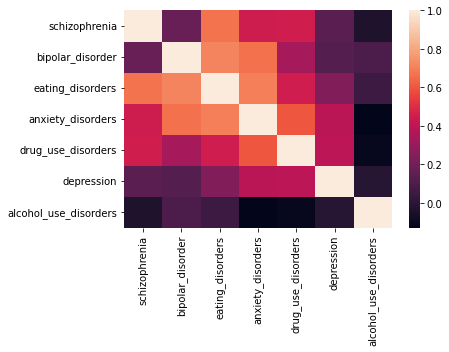

In [11]:
import seaborn as sns
sns.heatmap(df_subsdis.corr());

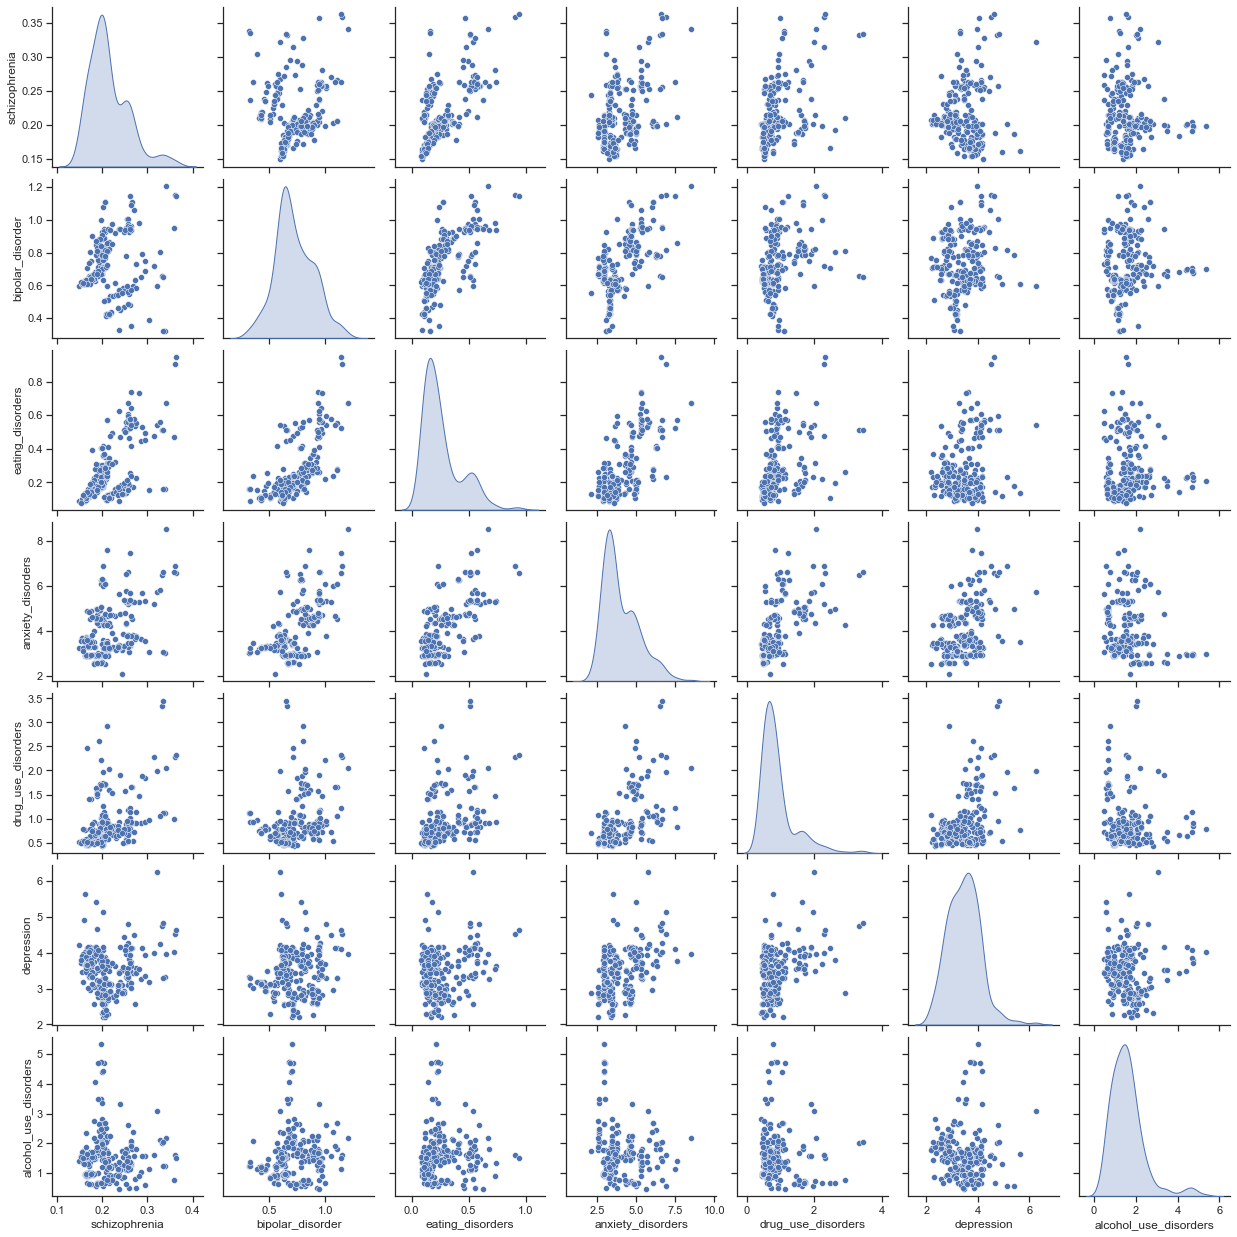

In [12]:
sns.set_theme(style="ticks")
sns.pairplot(df_subsdis,diag_kind='kde');

## Manejo de datos perdidos

Al momento de trabajar con una matriz de datos es importante examinar la presencia de datos perdidos. Si no damos un tratamiento riguroso a los datos perdidos quedamos expuestos a: 

- Reducción del tamaño de muestra disponible para el análisis.
- Datos sesgados cuando datos perdidos no siguen un patrón aleatorio.

Para un adecuado tratamiento de datos perdidos, podemos seguir 4 pasos.

### Paso 1: Determinar el tipo de datos perdidos

#### Datos perdidos ignorables 

Son inherentes al diseño de investigación y se espera que ocurran. 

La justificación para designar los datos faltantes como ignorables es que el proceso de datos faltantes está operando al azar (es decir, los valores observados son una muestra aleatoria del conjunto total de valores, observados y faltantes) o acomodándose explícitamente a la técnica utilizada. 

Hay tres casos en los que un investigador se encuentra con mayor frecuencia con datos faltantes ignorables:

- Una muestra como datos faltantes: cuando la muestra proviene de un muestreo probabilístico.
- Parte de la recolección de datos: cuando los participantes omiten respuestas que no aplican para ellos.
- Datos censurados: observaciones no completas debido a su etapa en el proceso de datos faltantes.

#### Datos perdidos no ignorables 

Provienen de procesos conocidos por el investigador o de procesos desconocidos. En ambos casos escapan al control del investigador y este no cuenta con un medio explícito para acomodar los datos faltantes en el análisis.

- Procesos conocidos: pueden ser identificados debido a factores de procedimiento, como errores en el ingreso de datos que crean códigos inválidos, restricciones de confidencialidad, no completar el cuestionario completo o incluso morbilidad del encuestado. 
  
- Procesos desconocidos: la mayoría de las veces estos casos están relacionados directamente con el encuestado. Un ejemplo es la negativa a responder a determinadas preguntas, que es común en cuestiones de naturaleza delicada (por ejemplo, ingresos o cuestiones controvertidas) o cuando el encuestado no tiene opinión o conocimientos insuficientes para responder a la pregunta.

En ambos casos, cuando los datos faltantes ocurren en un patrón aleatorio, puede haber remedios disponibles para mitigar su efecto.

### Paso 2: Determinar la cantidad de datos perdidos

Se busca determinar si la cantidad de datos faltantes es lo suficientemente baja como para no afectar los resultados, incluso si estos operan de manera no aleatoria. 

Si es lo suficientemente baja, entonces se puede aplicar cualquiera de los enfoques para remediar los datos faltantes. Si el nivel de datos faltantes no es lo suficientemente bajo, primero debemos determinar la aleatoriedad del proceso de datos faltantes antes de seleccionar una solución. 

¿Qué es lo suficientemente bajo?

El análisis debe considerarse en variables individuales, casos individuales o de manera global. Se cuenta con los siguientes criterios generales:

- 10 por ciento o menos: los casos u observaciones con hasta un 10 por ciento de datos faltantes son generalmente aceptables y susceptibles de cualquier estrategia de imputación.
- Muestra mínima suficiente: la muestra mínima con datos completos (es decir, sin datos faltantes en todas las variables) es suficiente para la estimación del modelo.

El investigador debe considerar el remedio simple de eliminar los casos o variables infractores con niveles excesivos de datos faltantes. El investigador puede encontrar que los datos faltantes se concentran en un pequeño subconjunto de casos o variables, y su exclusión reduce sustancialmente la extensión de los datos faltantes. En ese caso, se sugiere considerar:

- Los casos en los que faltan datos para las variables dependientes generalmente se eliminan para evitar cualquier aumento artificial en las relaciones con las variables independientes.
- Siempre considere realizar el análisis con y sin los casos o variables eliminadas para identificar diferencias marcadas.

### Paso 3: Diagnosticar el tipo de aleatoriedad de los datos perdidos

Imagina que se recopila información sobre dos variables (X e Y). A X no le faltan datos, pero a Y le faltan algunos datos. **Un proceso de datos faltantes no aleatorios está presente entre X e Y cuando ocurren diferencias significativas en los valores de X entre los casos que tienen datos válidos para Y versus aquellos casos con datos faltantes en Y**.

Dos características distinguen los tipos de datos perdidos: a) la aleatoriedad de los valores faltantes entre los valores de Y, y b) el grado de asociación entre la falta de una variable (en nuestro ejemplo Y) y otras variables observadas en el conjunto de datos (en nuestro ejemplo X). 

Presentamos las tres categorías:

- Missing at random (MAR): cuando los valores observados de Y se distribuyen aleatoriamente para cada nivel de X, pero los datos observados de Y no representan necesariamente una muestra verdaderamente aleatoria de todos los valores de Y. Ejemplo: género e ingreso.
 
- Missing completely at random (MCAR): cuando los valores observados de Y son una verdadera muestra aleatoria de todos los valores posibles en la población.

- Not missing at random (MNAR): cuando un patrón no aleatorio se encuentra entre los valores de Y, y la ausencia de los valores de Y puede estar o no relacionada con los valores de X.


### Paso 4: Seleccionar el método de imputación

Por imputación nos referimos a la estimación de los valores de casos perdidos en base a valores válidos de otras variables. La decisión sobre el método a utilizar se basa principalmente en si los datos faltantes son MAR o MCAR, pero en ambos casos el investigador tiene varias opciones de imputación.

#### Imputación de datos MCAR  

Se utiliza uno de los dos enfoques básicos: usar solo datos válidos o definir valores de reemplazo para los datos faltantes. A continuación se presentan algunas alternativas:

- Enfoque “Caso completo”: Incluir solo aquellas observaciones con datos completos. Poco recomendado. 
- Sustitución por la media: Reemplaza los valores perdidos de una variable con el valor medio de esa variable calculado a partir de todas las respuestas válidas.

#### Imputación de datos MAR

Si se encuentra un patrón de datos faltantes no aleatorios o MAR, el investigador debe aplicar solo un remedio: el enfoque de modelado diseñado específicamente para tratar con esto. La aplicación de cualquier otro método introduce sesgos en los resultados. Presentamos uno de los métodos más populares:

##### MICE: Imputación múltiple por ecuación encadenada. 

El procedimiento de imputación múltiple es, como su nombre lo indica, un proceso de generación de múltiples conjuntos de datos con los datos imputados que difieren en cada conjunto de datos, para proporcionar, en conjunto, estimaciones de parámetros no sesgadas y estimaciones correctas de los errores estándar. 

En el caso del procedimiento MICE, se utiliza una regresión lineal de manera iterativa para predecir los valores perdidos a partir de los valores disponibles.
       
#### Veamos un ejemplo

Exploremos la base de datos que corresponde a un estudio de mercado de la compañía HBAT. Esta cuenta con 9 variables cuantitativas (V1 a V9) relacionadas a la percepción del desempeño de la compañía y 5 variables categóricas (V10 a V14) relacionadas a las características de los encuestados.

In [13]:
!pip install pyreadstat
df = pd.read_spss('HBAT_MISSING.sav') 
df.head()

,ID,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14
0,201.0,3.3,0.9,8.6,4.0,2.1,1.8,6.3,41.0,4.5,0.0,1.0,0.0,0.0,2.0
1,202.0,NaN,0.4,NaN,2.5,1.2,1.7,5.2,35.0,3.3,0.0,1.0,0.0,0.0,1.0
2,203.0,3.0,NaN,9.1,7.1,3.5,3.4,NaN,55.0,5.2,0.0,1.0,1.0,0.0,3.0
3,204.0,NaN,1.5,NaN,4.8,1.9,2.5,7.2,36.0,NaN,1.0,0.0,1.0,0.0,1.0
4,205.0,5.1,1.4,NaN,4.8,3.3,2.6,3.8,49.0,4.9,0.0,1.0,0.0,0.0,2.0


Primero, visualicemos la cantidad de casos perdidos en cada item:

In [14]:
!pip install missingno

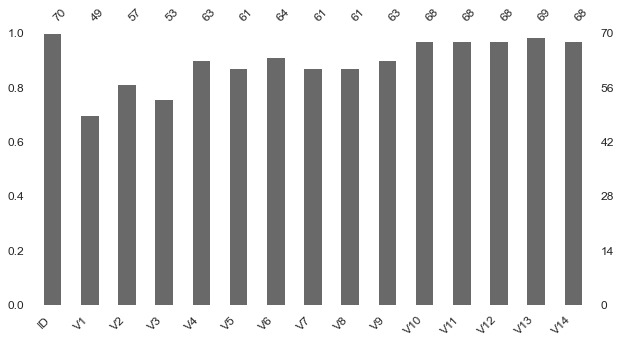

In [15]:
import missingno as msno
msno.bar(df, figsize=(10,5), fontsize=12);

El gráfico muestra un recuento de valores presentes por columnas ignorando los valores perdidos. En nuestro caso destaca la cantidad de casos perdidos en las columnas V1 y V3.

Ahora, exploremos la relación entre los casos perdidos entre los items:

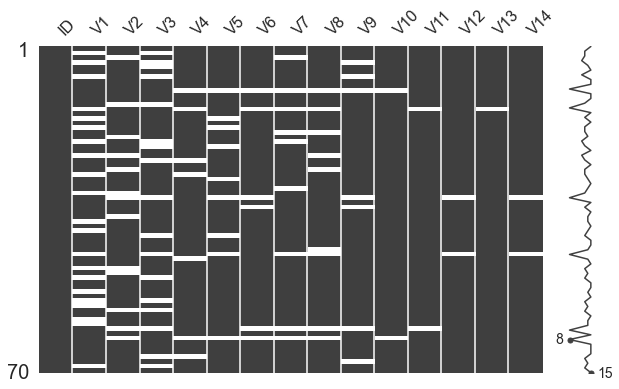

In [16]:
msno.matrix(df, figsize=(10, 6));

El gráfico de matriz de nulidad nos permite comprender la distribución de datos dentro del conjunto de datos completo en todas las columnas al mismo tiempo, lo que puede ayudarnos a comprender mejor la distribución de datos. También muestra un minigráfico que resalta las filas con nulidad máxima y mínima en un conjunto de datos. En nuestro ejemplo, el máximo sería la fila 8 y el mínimo la fila 15. 

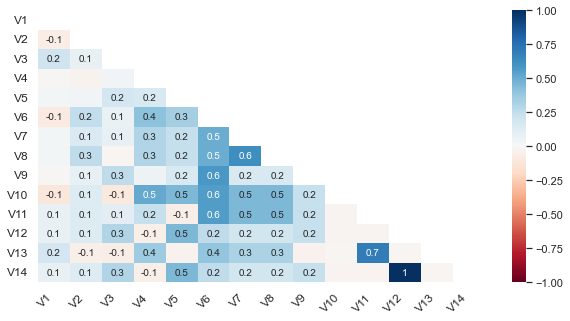

In [17]:
msno.heatmap(df, figsize=(10,5), fontsize=12);

El gráfico muestra la correlación de nulidad entre las columnas del conjunto de datos. Nos permite comprender cómo se relaciona el valor perdido de una columna con los valores perdidos en otras columnas. En nuestro caso, salta a la vista que hay algunas correlaciones grandes entre las variables, lo cual nos hace sospechar que no se trata de datos MCAR. Podemos verificar esta intuición con la prueba de Little: 

In [18]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [19]:
## Para instalar el paquete "naniar" de R
#%%R
#install.packages("naniar")

NULL


In [20]:
%%R
library(foreign)
library(naniar)

dat <- read.spss("HBAT_MISSING.sav", to.data.frame = TRUE) 
mcar_test(dat[c(2:10)])

# A tibble: 1 × 4
  statistic    df p.value missing.patterns
      <dbl> <dbl>   <dbl>            <int>
1      202.   180   0.126               29


La hipótesis nula para la prueba MCAR de Little es que los datos faltan completamente al azar (MCAR). Debido a que el valor de significancia es mayor que 0.05 en nuestro ejemplo, podemos concluir que los datos faltan completamente al azar (al menos para el bloque de variables cuantitativas).

Llegados a este punto, procedemos a implementar métodos simples de imputación. Partamos por el descarte de todos los valores perdidos.


Podemos implementarlo por filas:

In [21]:
df.dropna(axis=0)

,ID,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14
0,201.0,3.3,0.9,8.6,4.0,2.1,1.8,6.3,41.0,4.5,0.0,1.0,0.0,0.0,2.0
5,206.0,4.6,2.1,7.9,5.8,3.4,2.8,4.7,49.0,5.9,0.0,1.0,0.0,1.0,3.0
7,208.0,5.2,1.3,9.7,6.1,3.2,3.9,6.7,54.0,5.8,0.0,1.0,0.0,1.0,3.0
8,209.0,3.5,2.8,9.9,3.5,3.1,1.7,5.4,49.0,5.4,0.0,1.0,0.0,1.0,3.0
10,211.0,3.0,2.8,7.8,7.1,3.0,3.8,7.9,49.0,4.4,0.0,1.0,1.0,1.0,2.0
11,212.0,4.8,1.7,7.6,4.2,3.3,1.4,5.8,39.0,5.5,0.0,1.0,0.0,0.0,2.0
14,215.0,4.0,0.5,6.7,4.5,2.2,2.1,5.0,31.0,4.0,0.0,1.0,0.0,1.0,1.0
16,217.0,6.1,0.5,9.2,4.8,3.3,2.8,7.1,60.0,5.2,0.0,1.0,0.0,1.0,3.0
22,223.0,2.8,1.4,8.1,3.8,2.1,1.4,6.6,39.0,4.4,1.0,0.0,1.0,0.0,1.0
25,226.0,3.4,2.0,9.7,4.7,2.7,1.7,4.8,49.0,4.7,0.0,1.0,0.0,0.0,3.0


O por columnas:

In [22]:
df.dropna(axis=1)

,ID
0,201.0
1,202.0
2,203.0
3,204.0
4,205.0
...,...
65,266.0
66,267.0
67,268.0
68,269.0


Como podemos apreciar, no se recomienda descartar de plano los casos o variables donde hay datos perdidos presentes dado que se pierden datos que podrían ser utilizados en nuestros análisis. 

Otra alternativa sencilla es reemplazar los valores perdidos por el promedio de cada columna:

In [23]:
df.iloc[:,0:10].transform(lambda x: x.fillna(x.mean()))

,ID,V1,V2,V3,V4,V5,V6,V7,V8,V9
0,201.0,3.300000,0.90000,8.600000,4.000000,2.1,1.8,6.300000,41.0,4.50000
1,202.0,4.008163,0.40000,8.062264,2.500000,1.2,1.7,5.200000,35.0,3.30000
2,203.0,3.000000,1.94386,9.100000,7.100000,3.5,3.4,6.822951,55.0,5.20000
3,204.0,4.008163,1.50000,8.062264,4.800000,1.9,2.5,7.200000,36.0,4.75873
4,205.0,5.100000,1.40000,8.062264,4.800000,3.3,2.6,3.800000,49.0,4.90000
...,...,...,...,...,...,...,...,...,...,...
65,266.0,4.200000,2.40000,9.400000,4.900000,3.2,2.7,8.500000,49.0,5.20000
66,267.0,3.800000,0.80000,8.062264,5.168254,2.2,2.6,5.300000,42.0,5.10000
67,268.0,3.300000,2.60000,9.700000,3.300000,2.9,1.5,5.200000,47.0,4.75873
68,269.0,4.008163,1.90000,8.062264,4.500000,1.5,3.1,9.900000,39.0,3.30000


Ahora bien, incluso cuando los datos son MCAR se prefiere utilizar métodos más robustos para imputar.

Implementemos el procedimiento MICE:

In [24]:
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
imp = IterativeImputer(estimator=lr,missing_values=np.nan, max_iter=100, verbose=2, imputation_order='roman',random_state=0)
X=imp.fit_transform(df.iloc[:,1:10])

[IterativeImputer] Completing matrix with shape (70, 9)
[IterativeImputer] Ending imputation round 1/100, elapsed time 0.01
[IterativeImputer] Change: 16.95748339304501, scaled tolerance: 0.065 
[IterativeImputer] Ending imputation round 2/100, elapsed time 0.02
[IterativeImputer] Change: 3.406093561093631, scaled tolerance: 0.065 
[IterativeImputer] Ending imputation round 3/100, elapsed time 0.02
[IterativeImputer] Change: 1.9086300160431886, scaled tolerance: 0.065 
[IterativeImputer] Ending imputation round 4/100, elapsed time 0.03
[IterativeImputer] Change: 1.396503458078354, scaled tolerance: 0.065 
[IterativeImputer] Ending imputation round 5/100, elapsed time 0.04
[IterativeImputer] Change: 1.3196134377600082, scaled tolerance: 0.065 
[IterativeImputer] Ending imputation round 6/100, elapsed time 0.04
[IterativeImputer] Change: 1.1879090946248816, scaled tolerance: 0.065 
[IterativeImputer] Ending imputation round 7/100, elapsed time 0.05
[IterativeImputer] Change: 0.8688377046

In [25]:
pd.DataFrame(X,columns=df.iloc[:,1:10].columns.values.tolist())

,V1,V2,V3,V4,V5,V6,V7,V8,V9
0,3.300000,0.90000,8.600000,4.00000,2.1,1.8,6.300000,41.0,4.500000
1,2.562072,0.40000,8.276783,2.50000,1.2,1.7,5.200000,35.0,3.300000
2,3.000000,3.87854,9.100000,7.10000,3.5,3.4,8.947839,55.0,5.200000
3,2.640896,1.50000,7.751222,4.80000,1.9,2.5,7.200000,36.0,4.090088
4,5.100000,1.40000,7.896641,4.80000,3.3,2.6,3.800000,49.0,4.900000
...,...,...,...,...,...,...,...,...,...
65,4.200000,2.40000,9.400000,4.90000,3.2,2.7,8.500000,49.0,5.200000
66,3.800000,0.80000,8.754562,5.22809,2.2,2.6,5.300000,42.0,5.100000
67,3.300000,2.60000,9.700000,3.30000,2.9,1.5,5.200000,47.0,5.007311
68,1.719711,1.90000,7.959736,4.50000,1.5,3.1,9.900000,39.0,3.300000


Otra alternativa robusta es el imputador basado en el algoritmo k-NN:

In [26]:
from sklearn.impute import KNNImputer
knn = KNNImputer(n_neighbors=2, add_indicator=False)
knn.fit(df.iloc[:,1:])
df_complete = pd.DataFrame(knn.transform(df.iloc[:,1:]),columns=df.iloc[:,1:].columns.values.tolist()) 
df_complete

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14
0,3.30,0.90,8.60,4.0,2.1,1.8,6.3,41.0,4.50,0.0,1.0,0.0,0.0,2.0
1,3.70,0.40,7.45,2.5,1.2,1.7,5.2,35.0,3.30,0.0,1.0,0.0,0.0,1.0
2,3.00,2.55,9.10,7.1,3.5,3.4,7.5,55.0,5.20,0.0,1.0,1.0,0.0,3.0
3,3.15,1.50,5.85,4.8,1.9,2.5,7.2,36.0,3.50,1.0,0.0,1.0,0.0,1.0
4,5.10,1.40,8.80,4.8,3.3,2.6,3.8,49.0,4.90,0.0,1.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,4.20,2.40,9.40,4.9,3.2,2.7,8.5,49.0,5.20,0.0,1.0,0.0,1.0,2.0
66,3.80,0.80,9.05,5.0,2.2,2.6,5.3,42.0,5.10,0.0,1.0,0.0,0.0,2.0
67,3.30,2.60,9.70,3.3,2.9,1.5,5.2,47.0,5.15,0.0,1.0,0.0,1.0,3.0
68,3.60,1.90,5.10,4.5,1.5,3.1,9.9,39.0,3.30,1.0,0.0,1.0,1.0,1.0


## Outliers

Los valores atípicos, o anomalías en el lenguaje de la minería de datos, son observaciones con una combinación única de características identificables como claramente diferentes de lo que es "normal" en un conjunto de datos. Todos los análisis centrados en la detección de valores atípicos se basan en establecer las normas de comparación para que las observaciones individuales puedan evaluarse y la detección de valores atípicos pueda ser objetiva y rutinaria.

### Clasificación

Una manera de clasificarlos se enfoca en la naturaleza/carácter básico de las observaciones y lo que las hace diferentes de "normales". Al comprender la fuente de su singularidad, este enfoque se centra en las características fundamentales de las observaciones y en cómo, individualmente o quizás en combinación, crean esa singularidad para la observación. 

Las cuatro clases son:

- Por error procedimental: Errores en el registro de datos o en la codificación. Deben ser eliminados o marcados como datos faltantes. 
- Por evento extraordinario: Eventos inesperados y transitorios que afectan la medición (p.e. desastres naturales). El investigador debe decidir si el evento extraordinario se ajusta a los objetivos de la investigacion. 
- Por observaciones extraordinarias: Observaciones para los que no se cuenta con una explicación. Su retención queda a juicio del investigador. 
- Por ser combinaciones únicas: Combinaciones de valores inusuales registrados en todas las variables. Se sugiere retenerlos. 

En general, **los valores atípicos deben conservarse a menos que una prueba demostrable indique que son verdaderamente aberrantes y no representativos de ninguna observación en la población**. Si representan un elemento o segmento representativo de la población, deben conservarse para garantizar la generalización a toda la población. 

### Métodos de detección

A continuación presentamos los métodos utilizados para detectar valores atípicos en situaciones univariadas y multivariadas. Una vez identificados, pueden examinarse para ayudar a ubicarlos en una de las cuatro clases que se acaban de describir. Finalmente, el investigador debe decidir sobre la retención o exclusión de cada valor atípico, a juzgar no solo por las características del valor atípico sino también por los objetivos del análisis.

#### Detección de valores extremos univariados

- Para muestras pequeñas (80 o menos observaciones), los valores atípicos generalmente se definen como casos con puntajes fuera del rango de 2.5 desviaciones estándar alrededor de la media.
- Para muestras más grandes se extiende el rango a 4 desviaciones estándar alrededor de la media.

> No se recomienda utilizar únicamente este método para descartar valores extremos. 

Identiquemos los outliers de la variable V1 de acuerdo a este criterio:

In [27]:
# Los datos con los que trabajamos
data = df_complete.iloc[:,:10] 

# Visualizamos los outliers  
u = 2.5 # desviaciones estándar
v = "V1" # nombre de la variable
data[np.abs(data[v]-data[v].mean())>(u*data[v].std())]

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10
16,6.1,0.5,9.2,4.8,3.3,2.8,7.1,60.0,5.2,0.0
19,6.5,1.9,9.0,7.0,3.2,3.7,8.0,33.0,5.4,0.0


In [28]:
# Removemos outliers 
u = 2.5 # desviaciones estándar
v = "V1" # nombre de la variable
data[np.abs(data[v]-data[v].mean())<=(u*data[v].std())]

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10
0,3.30,0.90,8.60,4.0,2.1,1.8,6.3,41.0,4.50,0.0
1,3.70,0.40,7.45,2.5,1.2,1.7,5.2,35.0,3.30,0.0
2,3.00,2.55,9.10,7.1,3.5,3.4,7.5,55.0,5.20,0.0
3,3.15,1.50,5.85,4.8,1.9,2.5,7.2,36.0,3.50,1.0
4,5.10,1.40,8.80,4.8,3.3,2.6,3.8,49.0,4.90,0.0
...,...,...,...,...,...,...,...,...,...,...
65,4.20,2.40,9.40,4.9,3.2,2.7,8.5,49.0,5.20,0.0
66,3.80,0.80,9.05,5.0,2.2,2.6,5.3,42.0,5.10,0.0
67,3.30,2.60,9.70,3.3,2.9,1.5,5.2,47.0,5.15,0.0
68,3.60,1.90,5.10,4.5,1.5,3.1,9.9,39.0,3.30,1.0


#### Detección de valores extremos multivariados 

Más adecuado para examinar un variante completo, como las variables independientes en la regresión o las variables en el análisis factorial exploratorio.

Cuando se consideran más de dos variables, el investigador necesita un medio para medir objetivamente la posición multidimensional de cada observación en relación con algún punto común. 

Este problema se aborda con la distancia de Mahalanobis $D^{2}$, una evaluación multivariante de cada observación a través de un conjunto de variables. Los valores más altos de $D^{2}$ representan observaciones más alejadas de la distribución general de observaciones en este espacio multidimensional.

La medida $D^{2}$ dividida por el número de variables involucradas $D^{2}/df$ se distribuye aproximadamente como un valor t.

Dada la naturaleza de las pruebas estadísticas, se sugiere que se utilicen niveles conservadores de significancia (p.e. .005 o .001) como valor umbral para la designación como un valor atípico. Por lo tanto, **las observaciones que tengan un valor $D^{2}/df$ superior a 2,5 en muestras pequeñas y 3 o 4 en muestras grandes se pueden designar como posibles valores atípicos**.

Apliquemos este método a nuestro ejemplo:

In [29]:
from sklearn.covariance import MinCovDet

# Los datos con los que trabajamos
data = df_complete.iloc[:,:10] 

# Calculamos la distancia de Mahalanobis
robust_cov = MinCovDet().fit(data)
D2 = robust_cov.mahalanobis(data)

# Calculamos la métrica D^2/df
D2_df = D2/data.shape[1]
print(D2_df)

[ 0.95862289  3.08661304  1.07682996  0.5033451   5.28261543  1.00053276
  0.5033451   4.43840765  1.07086697  0.89699476  0.80263381  8.21332092
  1.40412821  0.90060449  5.41655457 16.17463397  6.07143297  1.01740017
  0.7109106  21.56485102  1.29057379  0.70291693  1.39100602  1.39764986
  0.7688178   1.71789111  4.95565348  7.55694333  4.82155425  0.95473028
  0.70548413  4.33676212  1.06819214  1.42517795  0.91232804  0.88189341
  7.97996201  6.54252319  1.07385608 21.70620755  5.7072796   1.04171869
  0.47572936  5.67590497  1.23845817  0.63445625  5.83027531  0.46133796
  7.91044925  1.44089048  1.33202133  1.51475555  1.0061482   1.29915055
  0.96988099  3.24772556  4.62176359  0.43340913  3.48756398  4.16174345
  6.1088981  16.77482519  1.05178906  3.41336045  0.760581    0.97485519
  0.68484324  1.02199598  2.71178401  1.52124654]


Reportamos los índices de los casos con un valor $D^{2}/df$ superior a 2.5 (recuerda que Python cuenta desde el 0):

In [30]:
print(np.where(D2_df>2.5))

(array([ 1,  4,  7, 11, 14, 15, 16, 19, 26, 27, 28, 31, 36, 37, 39, 40, 43,
       46, 48, 55, 56, 58, 59, 60, 61, 63, 68]),)
